# Preparing the environment and extracting dataset

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!unzip "/content/gdrive/My Drive/Colab Notebooks/data.zip"


Archive:  /content/gdrive/My Drive/Colab Notebooks/data.zip
  inflating: data.h5                 


In [3]:
!ls


data.h5  gdrive  sample_data


# Part B (i)
# Softmax layer (1 layer):
 (1 layer : 10, softmax)

# 2 layers Model :
(1 layer: 200 neuron , Relu ), (2 layer : 10, softmax)

List of arrays in this file: 
 KeysView(<HDF5 file "data.h5" (mode r)>)
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)
Instructions for updating:
Colocations handled automatically by placer.
Train on 180000 samples, validate on 20000 samples
Epoch 1/8
180000/180000 [==============================] - 10s 55us/sample - loss: 1.7217 - acc: 0.7189 - val_loss: 1.3277 - val_acc: 0.7535
Epoch 2/8
180000/180000 [==============================] - 9s 49us/sample - loss: 1.1380 - acc: 0.7714 - val_loss: 1.0034 - val_acc: 0.7787
Epoch 3/8
180000/180000 [==============================] - 9s 48us/sample - loss: 0.9294 - acc: 0.7886 - val_loss: 0.8718 - val_acc: 0.7915
Epoch 4/8
180000/180000 [==============================] - 9s 51us/sample - loss: 0.8372 - acc: 0.7979 - val_loss: 0.8069 - val_acc: 0.7993
Epoch 5/8
180000/180000 [==============================] - 9s 48us/sample - loss: 0.7885 - acc: 0.8037 - val_loss: 0.7694 - val_acc: 0.8051
Epoch 6/8
180

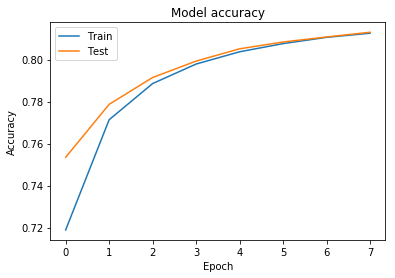

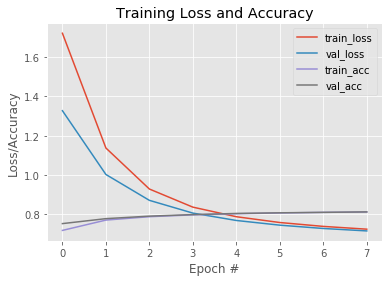

Train on 180000 samples, validate on 20000 samples
Epoch 1/8
180000/180000 [==============================] - 69s 381us/sample - loss: 0.7632 - acc: 0.8034 - val_loss: 0.6005 - val_acc: 0.8343
Epoch 2/8
180000/180000 [==============================] - 66s 367us/sample - loss: 0.5665 - acc: 0.8404 - val_loss: 0.5381 - val_acc: 0.8467
Epoch 3/8
180000/180000 [==============================] - 67s 370us/sample - loss: 0.5180 - acc: 0.8509 - val_loss: 0.5052 - val_acc: 0.8548
Epoch 4/8
180000/180000 [==============================] - 53s 292us/sample - loss: 0.4875 - acc: 0.8579 - val_loss: 0.4826 - val_acc: 0.8613
Epoch 5/8
180000/180000 [==============================] - 42s 232us/sample - loss: 0.4641 - acc: 0.8643 - val_loss: 0.4628 - val_acc: 0.8656
Epoch 6/8
180000/180000 [==============================] - 65s 363us/sample - loss: 0.4445 - acc: 0.8697 - val_loss: 0.4484 - val_acc: 0.8698
Epoch 7/8
180000/180000 [==============================] - 26s 147us/sample - loss: 0.4278 - acc:

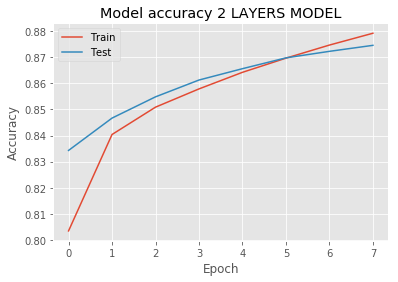

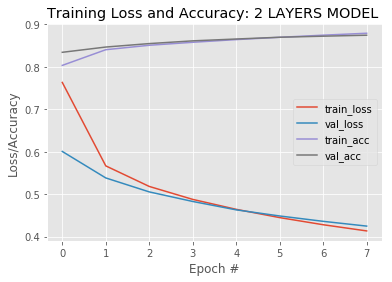

In [4]:
import tensorflow as tf 
import numpy as np
import h5py
import matplotlib.pyplot as plt

no_of_epochs = 8
def loadData():
    with h5py.File('data.h5','r') as hf:
      
          print('List of arrays in this file: \n', hf.keys())
          allTrain = hf.get('trainData')
          allTest = hf.get('testData')
          npTrain = np.array(allTrain)
          npTest = np.array(allTest)
          
          print('Shape of the array dataset_1: \n', npTrain.shape)
          print('Shape of the array dataset_2: \n', npTest.shape) 
          
    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]

#Calling loadData() 
x_train, y_train, x_test, y_test = loadData()

#Normalizing data
x_train, x_test= x_train/ 255.0, x_test/ 255.0

#Building Keras model 
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation="softmax", batch_size = 256)])

#Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#Training the model 
history = model.fit(x_train, y_train, epochs=no_of_epochs,  validation_split=0.1)
print(history.history.keys())

#Tesing the model 
results = model.evaluate(x_test, y_test)
print ("\nLoss and Accuracy of model ",results)

#Plotting the graph
plt.plot(history.history['acc'])

# Plot training & validation accuracy values
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, no_of_epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_of_epochs), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


########################## 2 LAYER MODEL ##################################

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(200, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(10, activation="softmax", batch_size = 256)])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=no_of_epochs,  validation_split=0.1)
print(history.history.keys())

results = model.evaluate(x_test, y_test)
print ("\nLoss and Accuracy of model ",results)

plt.plot(history.history['acc'])

# Plot training & validation accuracy values
plt.plot(history.history['val_acc'])
plt.title('Model accuracy 2 LAYERS MODEL')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, no_of_epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_of_epochs), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy: 2 LAYERS MODEL ")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()







# **PART B (ii)** 
# 3 layer model:
(1 layer: 400 neuron, Relu) (2 layer: 200 neuron, Relu) (3 layer: 10, softmax)

# 4  Layers model : 
(1 layer: 600 neuron, Relu) (2 layer: 400 neuron, Relu) (3 layer: 200 neuron, Relu) (4 layer: 10, softmax)

# 5 layer model:
(1 layer: 700 neuron, Relu) (2 layer: 600 neuron, Relu) (3 layer: 400 neuron, Relu) (4 layer: 200, Relu) (5 layer: 10, Softmax)



List of arrays in this file: 
 KeysView(<HDF5 file "data.h5" (mode r)>)
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)
Train on 180000 samples, validate on 20000 samples
Epoch 1/8
180000/180000 [==============================] - 73s 406us/sample - loss: 0.5870 - acc: 0.8300 - val_loss: 0.4708 - val_acc: 0.8558
Epoch 2/8
180000/180000 [==============================] - 70s 387us/sample - loss: 0.4313 - acc: 0.8690 - val_loss: 0.4083 - val_acc: 0.8760
Epoch 3/8
180000/180000 [==============================] - 66s 369us/sample - loss: 0.3768 - acc: 0.8850 - val_loss: 0.3764 - val_acc: 0.8863
Epoch 4/8
180000/180000 [==============================] - 68s 379us/sample - loss: 0.3412 - acc: 0.8957 - val_loss: 0.3618 - val_acc: 0.8914
Epoch 5/8
180000/180000 [==============================] - 72s 399us/sample - loss: 0.3147 - acc: 0.9032 - val_loss: 0.3458 - val_acc: 0.8970
Epoch 6/8
180000/180000 [==============================] - 70s 391us/sample 

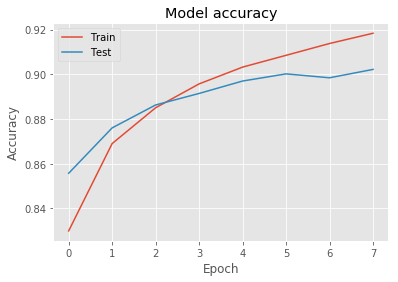

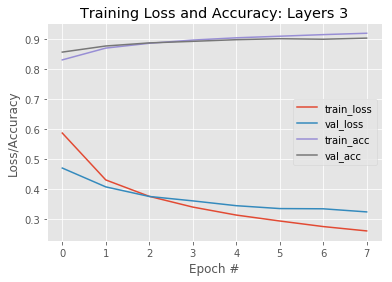

Train on 180000 samples, validate on 20000 samples
Epoch 1/8
180000/180000 [==============================] - 113s 628us/sample - loss: 0.5370 - acc: 0.8360 - val_loss: 0.4543 - val_acc: 0.8598
Epoch 2/8
180000/180000 [==============================] - 113s 628us/sample - loss: 0.3937 - acc: 0.8776 - val_loss: 0.3784 - val_acc: 0.8826
Epoch 3/8
180000/180000 [==============================] - 111s 615us/sample - loss: 0.3443 - acc: 0.8919 - val_loss: 0.3532 - val_acc: 0.8909
Epoch 4/8
180000/180000 [==============================] - 112s 620us/sample - loss: 0.3118 - acc: 0.9015 - val_loss: 0.3402 - val_acc: 0.8963
Epoch 5/8
180000/180000 [==============================] - 111s 617us/sample - loss: 0.2861 - acc: 0.9094 - val_loss: 0.3322 - val_acc: 0.8982
Epoch 6/8
180000/180000 [==============================] - 112s 621us/sample - loss: 0.2657 - acc: 0.9151 - val_loss: 0.3500 - val_acc: 0.8926
Epoch 7/8
180000/180000 [==============================] - 111s 618us/sample - loss: 0.2459

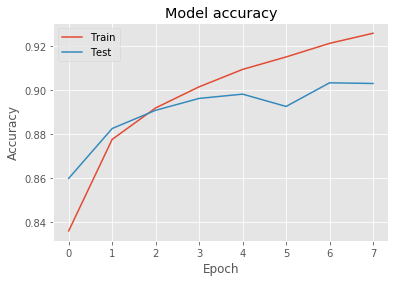

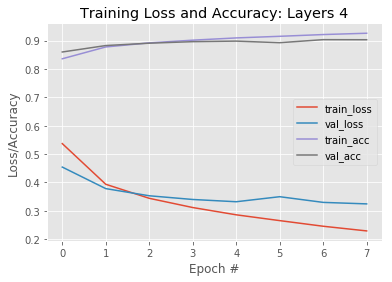

Train on 180000 samples, validate on 20000 samples
Epoch 1/8
180000/180000 [==============================] - 158s 879us/sample - loss: 0.5363 - acc: 0.8350 - val_loss: 0.4653 - val_acc: 0.8550
Epoch 2/8
180000/180000 [==============================] - 155s 862us/sample - loss: 0.3992 - acc: 0.8755 - val_loss: 0.3821 - val_acc: 0.8848
Epoch 3/8
180000/180000 [==============================] - 156s 865us/sample - loss: 0.3501 - acc: 0.8901 - val_loss: 0.3576 - val_acc: 0.8891
Epoch 4/8
180000/180000 [==============================] - 154s 858us/sample - loss: 0.3172 - acc: 0.8997 - val_loss: 0.3376 - val_acc: 0.8953
Epoch 5/8
180000/180000 [==============================] - 156s 867us/sample - loss: 0.2925 - acc: 0.9065 - val_loss: 0.3377 - val_acc: 0.8968
Epoch 6/8
180000/180000 [==============================] - 153s 851us/sample - loss: 0.2725 - acc: 0.9127 - val_loss: 0.3191 - val_acc: 0.9023
Epoch 7/8
180000/180000 [==============================] - 156s 864us/sample - loss: 0.2539

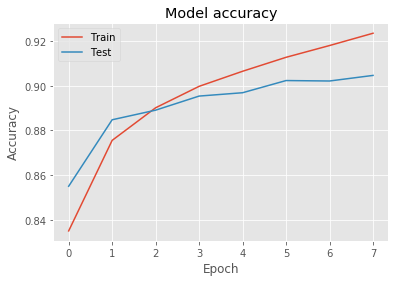

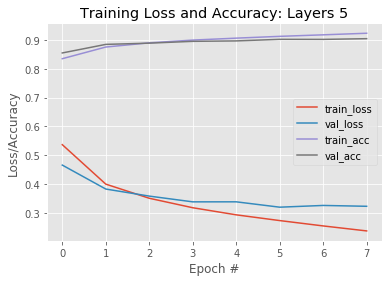

In [0]:
import tensorflow as tf 
import numpy as np
import h5py
from keras.layers.core import Dropout
from keras import regularizers
import matplotlib.pyplot as plt

no_of_epochs = 8
def loadData():
    with h5py.File('data.h5','r') as hf:
      
          print('List of arrays in this file: \n', hf.keys())
          allTrain = hf.get('trainData')
          allTest = hf.get('testData')
          npTrain = np.array(allTrain)
          npTest = np.array(allTest)
          
          print('Shape of the array dataset_1: \n', npTrain.shape)
          print('Shape of the array dataset_2: \n', npTest.shape) 
          
    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]

x_train, y_train, x_test, y_test = loadData()

x_train, x_test= x_train/ 255.0, x_test/ 255.0

############################ 3 LAYER MODEL  ############################
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(400, activation="relu",input_shape=(784,)),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=no_of_epochs,  validation_split=0.1)
print(history.history.keys())

results = model.evaluate(x_test, y_test)
print ("\nLoss and Accuracy of 3 layer model ",results)

plt.plot(history.history['acc'])

# Plot training & validation accuracy value
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, no_of_epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_of_epochs), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy: Layers 3")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


######################## 4 LAYER MODEL #########################

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(600, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=no_of_epochs,  validation_split=0.1)
print(history.history.keys())


results = model.evaluate(x_test, y_test)
print ("\nLoss and Accuracy of 4 layer model ",results)


plt.plot(history.history['acc'])

# Plot training & validation accuracy value
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, no_of_epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_of_epochs), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy: Layers 4")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

######################### 5 LAYER MODEL #############################

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(700, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(600, activation=tf.nn.relu),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=no_of_epochs,  validation_split=0.1)
print(history.history.keys())
results = model.evaluate(x_test, y_test)
print ("\nLoss and Accuracy of 5 layer model ",results)

plt.plot(history.history['acc'])

# Plot training & validation accuracy value
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, no_of_epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_of_epochs), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy: Layers 5")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()



# Applying Dropout, L1 and L2 Regularizer on 4 layers model
• Applying L2 regularizer (0.02)

• Applying Dropout (0.2)

• Applying L1 regularizer (0.02)

Using TensorFlow backend.


List of arrays in this file: 
 KeysView(<HDF5 file "data.h5" (mode r)>)
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)
Train on 180000 samples, validate on 20000 samples
Epoch 1/8
180000/180000 [==============================] - 81s 452us/sample - loss: 1.6977 - acc: 0.7493 - val_loss: 0.9454 - val_acc: 0.8104
Epoch 2/8
180000/180000 [==============================] - 80s 442us/sample - loss: 0.8715 - acc: 0.8271 - val_loss: 0.8250 - val_acc: 0.8317
Epoch 3/8
180000/180000 [==============================] - 82s 453us/sample - loss: 0.7722 - acc: 0.8476 - val_loss: 0.7511 - val_acc: 0.8536
Epoch 4/8
180000/180000 [==============================] - 81s 450us/sample - loss: 0.7217 - acc: 0.8595 - val_loss: 0.7155 - val_acc: 0.8592
Epoch 5/8
180000/180000 [==============================] - 80s 442us/sample - loss: 0.6868 - acc: 0.8683 - val_loss: 0.6891 - val_acc: 0.8651
Epoch 6/8
180000/180000 [==============================] - 81s 448us/sample 

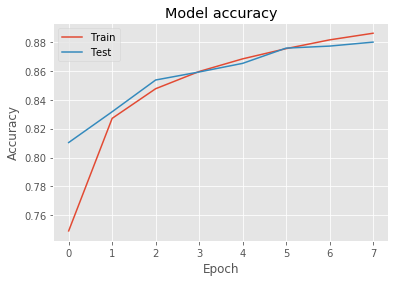

Train on 180000 samples, validate on 20000 samples
Epoch 1/8
180000/180000 [==============================] - 80s 446us/sample - loss: 0.7261 - acc: 0.8126 - val_loss: 0.5630 - val_acc: 0.8449
Epoch 2/8
180000/180000 [==============================] - 79s 439us/sample - loss: 0.5158 - acc: 0.8564 - val_loss: 0.4842 - val_acc: 0.8648
Epoch 3/8
180000/180000 [==============================] - 81s 448us/sample - loss: 0.4553 - acc: 0.8730 - val_loss: 0.4463 - val_acc: 0.8754
Epoch 4/8
180000/180000 [==============================] - 77s 428us/sample - loss: 0.4156 - acc: 0.8843 - val_loss: 0.4188 - val_acc: 0.8830
Epoch 5/8
180000/180000 [==============================] - 78s 431us/sample - loss: 0.3885 - acc: 0.8918 - val_loss: 0.4037 - val_acc: 0.8856
Epoch 6/8
180000/180000 [==============================] - 77s 427us/sample - loss: 0.3657 - acc: 0.8980 - val_loss: 0.4150 - val_acc: 0.8827
Epoch 7/8
180000/180000 [==============================] - 80s 444us/sample - loss: 0.3485 - acc:

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 180000 samples, validate on 20000 samples
Epoch 1/8
180000/180000 [==============================] - 78s 434us/sample - loss: 0.5442 - acc: 0.8343 - val_loss: 0.4348 - val_acc: 0.8660
Epoch 2/8
180000/180000 [==============================] - 79s 439us/sample - loss: 0.4014 - acc: 0.8756 - val_loss: 0.4069 - val_acc: 0.8766
Epoch 3/8
180000/180000 [==============================] - 79s 439us/sample - loss: 0.3517 - acc: 0.8898 - val_loss: 0.3583 - val_acc: 0.8886
Epoch 4/8
180000/180000 [==============================] - 82s 456us/sample - loss: 0.3179 - acc: 0.9002 - val_loss: 0.3382 - val_acc: 0.8954
Epoch 5/8
180000/180000 [==============================] - 81s 450us/sample - loss: 0.2930 - acc: 0.9077 - val_loss: 0.3265 - val_acc: 0.9017
Epoch 6/8
180000/180000 [==============================] - 81s 448us/sample - loss: 0.2715 - acc: 0.9131 - val_loss: 0.3287 

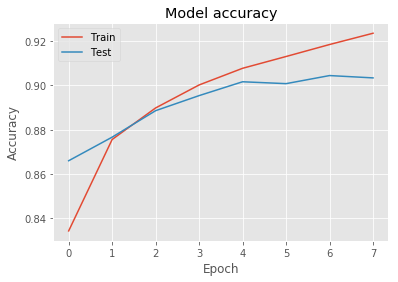

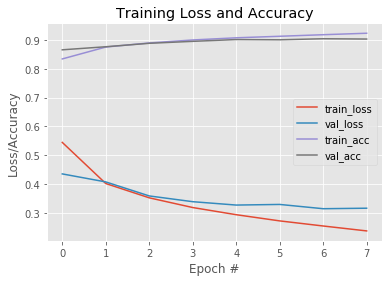

In [5]:
import tensorflow as tf 
import numpy as np
import h5py
from keras.layers.core import Dropout
from keras import regularizers
import matplotlib.pyplot as plt

no_of_epochs = 8
def loadData():
    with h5py.File('data.h5','r') as hf:
      
          print('List of arrays in this file: \n', hf.keys())
          allTrain = hf.get('trainData')
          allTest = hf.get('testData')
          npTrain = np.array(allTrain)
          npTest = np.array(allTest)
          
          print('Shape of the array dataset_1: \n', npTrain.shape)
          print('Shape of the array dataset_2: \n', npTest.shape) 
          
    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]

x_train, y_train, x_test, y_test = loadData()

x_train, x_test= x_train/ 255.0, x_test/ 255.0


######################## Applying L1 Regularizer (0.02) on 4 layers model ######################

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(600, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu, kernel_regularizer=regularizers.l1(0.02)),
    tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=no_of_epochs,  validation_split=0.1)
print(history.history.keys())

results = model.evaluate(x_test, y_test)
print ("\nLoss and Accuracy of 4 layer model applying L1 Regularizer (0.02)",results)

plt.plot(history.history['acc'])

# Plot training & validation accuracy value
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, no_of_epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_of_epochs), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

###########################  Applying L2 Regularizer (0.02) on 4 layers model ######################

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(600, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu,kernel_regularizer=regularizers.l2(0.02)),
    tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=no_of_epochs,  validation_split=0.1)
print(history.history.keys())

results = model.evaluate(x_test, y_test)
print ("\nLoss and Accuracy of 4 layer model applying L2 Regularizer (0.02)",results)

plt.plot(history.history['acc'])

# Plot training & validation accuracy value
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, no_of_epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_of_epochs), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


######################## Applying Dropout(0.2) on 4 layers model #############################

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(600, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax", batch_size = 256)])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=no_of_epochs,  validation_split=0.1)
print(history.history.keys())

results = model.evaluate(x_test, y_test)
print ("\nLoss and Accuracy of 4 layer model applying Dropout (0.2)",results)

plt.plot(history.history['acc'])

# Plot training & validation accuracy value
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, no_of_epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_of_epochs), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()



#  Applying Dropout, L1 and L2 Regularizer on 5 layers model
• Applying L2 regularizer (0.02)

• Applying Dropout (0.2)

• Applying L1 regularizer (0.02)

List of arrays in this file: 
 KeysView(<HDF5 file "data.h5" (mode r)>)
Shape of the array dataset_1: 
 (200000, 785)
Shape of the array dataset_2: 
 (17000, 785)
Train on 180000 samples, validate on 20000 samples
Epoch 1/8
180000/180000 [==============================] - 142s 791us/sample - loss: 0.6488 - acc: 0.8245 - val_loss: 0.4955 - val_acc: 0.8575
Epoch 2/8
180000/180000 [==============================] - 144s 802us/sample - loss: 0.4555 - acc: 0.8682 - val_loss: 0.4494 - val_acc: 0.8684
Epoch 3/8
180000/180000 [==============================] - 144s 802us/sample - loss: 0.3969 - acc: 0.8834 - val_loss: 0.3975 - val_acc: 0.8830
Epoch 4/8
180000/180000 [==============================] - 145s 804us/sample - loss: 0.3606 - acc: 0.8942 - val_loss: 0.3723 - val_acc: 0.8920
Epoch 5/8
180000/180000 [==============================] - 145s 803us/sample - loss: 0.3330 - acc: 0.9015 - val_loss: 0.3655 - val_acc: 0.8949
Epoch 6/8
180000/180000 [==============================] - 144s 802us/s

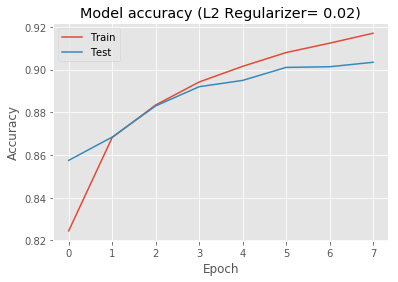

Train on 180000 samples, validate on 20000 samples
Epoch 1/8
180000/180000 [==============================] - 144s 800us/sample - loss: 0.5401 - acc: 0.8336 - val_loss: 0.4619 - val_acc: 0.8560
Epoch 2/8
180000/180000 [==============================] - 143s 796us/sample - loss: 0.4042 - acc: 0.8745 - val_loss: 0.3858 - val_acc: 0.8796
Epoch 3/8
180000/180000 [==============================] - 142s 790us/sample - loss: 0.3529 - acc: 0.8900 - val_loss: 0.3794 - val_acc: 0.8828
Epoch 4/8
180000/180000 [==============================] - 143s 797us/sample - loss: 0.3206 - acc: 0.9001 - val_loss: 0.3522 - val_acc: 0.8929
Epoch 5/8
180000/180000 [==============================] - 146s 813us/sample - loss: 0.2957 - acc: 0.9067 - val_loss: 0.3311 - val_acc: 0.9021
Epoch 6/8
180000/180000 [==============================] - 145s 803us/sample - loss: 0.2751 - acc: 0.9126 - val_loss: 0.3194 - val_acc: 0.9034
Epoch 7/8
180000/180000 [==============================] - 143s 797us/sample - loss: 0.2568

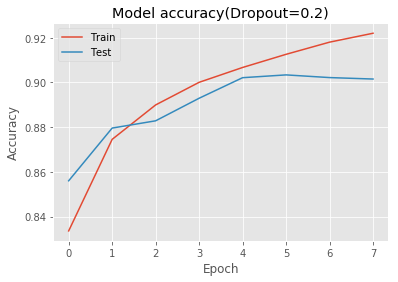

Train on 180000 samples, validate on 20000 samples
Epoch 1/8
180000/180000 [==============================] - 143s 797us/sample - loss: 1.4664 - acc: 0.7956 - val_loss: 0.7449 - val_acc: 0.8462
Epoch 2/8
180000/180000 [==============================] - 140s 776us/sample - loss: 0.6922 - acc: 0.8598 - val_loss: 0.6903 - val_acc: 0.8566
Epoch 3/8
180000/180000 [==============================] - 137s 762us/sample - loss: 0.6247 - acc: 0.8772 - val_loss: 0.6289 - val_acc: 0.8719
Epoch 4/8
180000/180000 [==============================] - 138s 766us/sample - loss: 0.5834 - acc: 0.8877 - val_loss: 0.5873 - val_acc: 0.8873
Epoch 5/8
180000/180000 [==============================] - 142s 789us/sample - loss: 0.5520 - acc: 0.8962 - val_loss: 0.5708 - val_acc: 0.8924
Epoch 6/8
180000/180000 [==============================] - 143s 797us/sample - loss: 0.5291 - acc: 0.9021 - val_loss: 0.5642 - val_acc: 0.8913
Epoch 7/8
180000/180000 [==============================] - 140s 777us/sample - loss: 0.5082

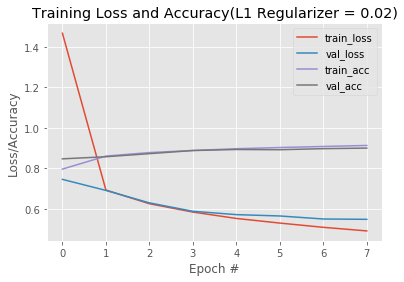

In [6]:
import tensorflow as tf 
import numpy as np
import h5py
from keras.layers.core import Dropout
from keras import regularizers
import matplotlib.pyplot as plt

no_of_epochs = 8
def loadData():
    with h5py.File('data.h5','r') as hf:
      
          print('List of arrays in this file: \n', hf.keys())
          allTrain = hf.get('trainData')
          allTest = hf.get('testData')
          npTrain = np.array(allTrain)
          npTest = np.array(allTest)
          
          print('Shape of the array dataset_1: \n', npTrain.shape)
          print('Shape of the array dataset_2: \n', npTest.shape) 
          
    return npTrain[:,:-1], npTrain[:, -1], npTest[:,:-1], npTest[:, -1]

x_train, y_train, x_test, y_test = loadData()

x_train, x_test= x_train/ 255.0, x_test/ 255.0

#################  Applying L2 Regularizer (0.02) on 5 layers model ##################

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(700, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(600, activation=tf.nn.relu),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu, kernel_regularizer=regularizers.l2(0.02)),
    tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=no_of_epochs,  validation_split=0.1)
print(history.history.keys())

results = model.evaluate(x_test, y_test)
print ("\nLoss and Accuracy of 5 layer model applying L2 Regularizer (0.02)",results)

plt.plot(history.history['acc'])

# Plot training & validation accuracy value
plt.plot(history.history['val_acc'])
plt.title('Model accuracy (L2 Regularizer= 0.02)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, no_of_epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_of_epochs), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (L2 Regularizer= 0.02)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

################# Applying Dropout(0.2) on 5 layers model ######################

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(700, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(600, activation=tf.nn.relu),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=no_of_epochs,  validation_split=0.1)
print(history.history.keys())
results = model.evaluate(x_test, y_test)
print ("\nLoss and Accuracy of 5 layer model applying Dropout (0.2)",results)


plt.plot(history.history['acc'])

# Plot training & validation accuracy value
plt.plot(history.history['val_acc'])
plt.title('Model accuracy(Dropout=0.2)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, no_of_epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_of_epochs), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy(Dropout = 0.2)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()


################# Applying L1 Regularizer(0.05) on 5 layers model #####################
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(700, activation=tf.nn.relu, input_shape=(784,)),
    tf.keras.layers.Dense(600, activation=tf.nn.relu),
    tf.keras.layers.Dense(400, activation=tf.nn.relu),
    tf.keras.layers.Dense(200, activation=tf.nn.relu,kernel_regularizer=regularizers.l1(0.02)),
    tf.keras.layers.Dense(10, activation="softmax")])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=no_of_epochs,  validation_split=0.1)
print(history.history.keys())
results = model.evaluate(x_test, y_test)
print ("\nLoss and Accuracy of 5 layer model applying L1 Regularizer (0.02)",results)


plt.plot(history.history['acc'])

# Plot training & validation accuracy value
plt.plot(history.history['val_acc'])
plt.title('Model accuracy (L1 Regularizer = 0.02)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.show()


plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, no_of_epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, no_of_epochs), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, no_of_epochs), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy(L1 Regularizer = 0.02)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

